In [3]:
import numpy as np
import pandas as pd

In [1]:
import pickle

routes = pickle.load( open( "save2.p", "rb" ) )

In [4]:
%%time
xstack = np.hstack(routes.x_bin.to_list())
ystack = np.hstack(routes.y_bin.to_list())

Wall time: 2.31 s


In [5]:
xstack_df = pd.DataFrame(xstack, columns = ['coordinate'])
ystack_df = pd.DataFrame(ystack, columns = ['coordinate'])

In [6]:
routes[['duration', 'x_bin', 'y_bin']].loc[50, 'x_bin']

array([480820, 480820, 480818, 480773, 480760, 480708, 480688, 480734,
       480747, 480725, 480785, 480808, 480822, 480901, 480984, 481096,
       481218, 481319, 481338, 481359, 481476, 481596, 481708, 481767,
       481807], dtype=int64)

In [7]:
routes[['duration', 'x_bin', 'y_bin']].loc[50, 'y_bin']

array([314645, 314645, 314646, 314654, 314636, 314614, 314592, 314554,
       314520, 314496, 314464, 314435, 314407, 314388, 314376, 314359,
       314337, 314319, 314316, 314313, 314299, 314284, 314271, 314258,
       314253], dtype=int64)

In [8]:
x_value_counts = pd.DataFrame(xstack_df['coordinate'].value_counts())

In [9]:
y_value_counts = pd.DataFrame(ystack_df['coordinate'].value_counts())

# Restrict Bins

In [10]:
tresh = 50000

x_restrict = x_value_counts[x_value_counts.coordinate > tresh].index
y_restrict = y_value_counts[y_value_counts.coordinate > tresh].index

In [35]:
len(x_restrict)

142

In [36]:
len(y_restrict)

366

In [25]:
df = routes[['duration', 'x_bin', 'y_bin']]

In [26]:
def coor_map(array, coordinate):
    return int(coordinate in array)

In [28]:
%%time
for count, coordinate in enumerate(x_restrict):
    df['x_' + str(coordinate)] = df['x_bin'].apply(coor_map, coordinate = coordinate)
    print(count/len(x_restrict))

c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.0
0.007042253521126761
0.014084507042253521
0.02112676056338028
0.028169014084507043
0.035211267605633804
0.04225352112676056
0.04929577464788732
0.056338028169014086
0.06338028169014084
0.07042253521126761
0.07746478873239436
0.08450704225352113
0.09154929577464789
0.09859154929577464
0.1056338028169014
0.11267605633802817
0.11971830985915492
0.1267605633802817
0.13380281690140844
0.14084507042253522
0.14788732394366197
0.15492957746478872
0.1619718309859155
0.16901408450704225
0.176056338028169
0.18309859154929578
0.19014084507042253
0.19718309859154928
0.20422535211267606
0.2112676056338028
0.21830985915492956
0.22535211267605634
0.2323943661971831
0.23943661971830985
0.24647887323943662
0.2535211267605634
0.2605633802816901
0.2676056338028169
0.2746478873239437
0.28169014084507044
0.2887323943661972
0.29577464788732394
0.3028169014084507
0.30985915492957744
0.31690140845070425
0.323943661971831
0.33098591549295775
0.3380281690140845
0.34507042253521125
0.352112676056338
0.3591549

In [37]:
%%time
for count, coordinate in enumerate(y_restrict):
    df['y_' + str(coordinate)] = df['y_bin'].apply(coor_map, coordinate = coordinate)
    print(count/len(y_restrict))

0.0
0.00273224043715847
0.00546448087431694
0.00819672131147541
0.01092896174863388
0.01366120218579235
0.01639344262295082
0.01912568306010929
0.02185792349726776
0.02459016393442623
0.0273224043715847
0.030054644808743168
0.03278688524590164
0.03551912568306011
0.03825136612021858
0.040983606557377046
0.04371584699453552
0.04644808743169399
0.04918032786885246
0.05191256830601093
0.0546448087431694
0.05737704918032787
0.060109289617486336
0.06284153005464481
0.06557377049180328
0.06830601092896176
0.07103825136612021
0.07377049180327869
0.07650273224043716
0.07923497267759563
0.08196721311475409
0.08469945355191257
0.08743169398907104
0.09016393442622951
0.09289617486338798
0.09562841530054644
0.09836065573770492
0.10109289617486339
0.10382513661202186
0.10655737704918032
0.1092896174863388
0.11202185792349727
0.11475409836065574
0.11748633879781421
0.12021857923497267
0.12295081967213115
0.12568306010928962
0.1284153005464481
0.13114754098360656
0.13387978142076504
0.136612021857923

In [38]:
df

,duration,x_bin,y_bin,x_480648,x_480993,x_480709,x_480734,x_480743,x_480984,x_480752,...,y_315235,y_314707,y_314643,y_315217,y_314709,y_314719,y_315322,y_314467,y_315028,y_315043
0,5.50,"[481091, 481091, 481092, 481092, 481091, 48101...","[314904, 314904, 314904, 314904, 314900, 31488...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.50,"[481940, 481939, 481906, 481852, 481798, 48172...","[314515, 314515, 314505, 314489, 314472, 31445...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16.00,"[480358, 480375, 480433, 480509, 480564, 48058...","[315069, 315054, 315031, 315010, 314979, 31495...",0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,10.50,"[480483, 480483, 480482, 480481, 480478, 48047...","[315158, 315158, 315158, 315158, 315158, 31515...",0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,7.00,"[482330, 482329, 482314, 482260, 482251, 48224...","[314276, 314276, 314276, 314273, 314256, 31425...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710662,17.50,"[485416, 485416, 485417, 485418, 485457, 48553...","[314466, 314467, 314467, 314466, 314465, 31446...",0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1710665,7.75,"[481958, 481957, 481953, 481951, 481880, 48178...","[315121, 315121, 315112, 315103, 315104, 31511...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1710666,7.25,"[481315, 481314, 481315, 481314, 481309, 48129...","[314942, 314942, 314942, 314942, 314942, 31493...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1710668,15.25,"[482090, 482018, 481946, 481886, 481829, 48177...","[315392, 315383, 315374, 315363, 315343, 31532...",0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [39]:
y = df['duration']

In [40]:
X = df.iloc[:,3:]

In [50]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.5111534338043163

In [55]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1000)
clf.fit(X, y) 
clf.score(X, y)

0.51110161488612

In [59]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=0).fit(X, y)
lasso.score(X, y)

0.5111475686282114

In [72]:
coef_df = pd.DataFrame(zip(reg.coef_, X.columns), columns = ['coef', 'bin'])

In [74]:
%matplotlib inline
import matplotlib as plt

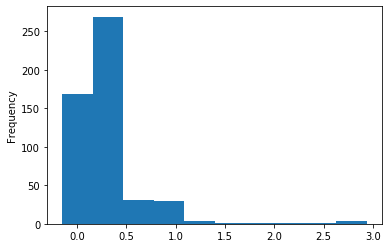

In [77]:
coef_df['coef'].plot(kind = 'hist')

In [89]:
len(coef_df[coef_df.coef < 0])

27

In [88]:
len(coef_df[coef_df.coef >  0])

481

In [85]:
len(coef_df[coef_df.coef >  .5])

65

In [86]:
len(coef_df[coef_df.coef >  1])

19

In [87]:
len(coef_df[coef_df.coef >  2])

5